<a href="https://colab.research.google.com/github/kunaldeep28/CIFAR10/blob/master/CIFAR10_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import *

In [0]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

In [18]:
path = untar_data('https://s3.amazonaws.com/fast-ai-imageclas/cifar10'); path

PosixPath('/root/.fastai/data/cifar10')

In [19]:
path.ls()

[PosixPath('/root/.fastai/data/cifar10/train'),
 PosixPath('/root/.fastai/data/cifar10/test')]

In [0]:
path_train = path/'train'
path_test = path/'test'

In [21]:
path_train.ls()

[PosixPath('/root/.fastai/data/cifar10/train/cat'),
 PosixPath('/root/.fastai/data/cifar10/train/dog'),
 PosixPath('/root/.fastai/data/cifar10/train/automobile'),
 PosixPath('/root/.fastai/data/cifar10/train/bird'),
 PosixPath('/root/.fastai/data/cifar10/train/airplane'),
 PosixPath('/root/.fastai/data/cifar10/train/frog'),
 PosixPath('/root/.fastai/data/cifar10/train/deer'),
 PosixPath('/root/.fastai/data/cifar10/train/horse'),
 PosixPath('/root/.fastai/data/cifar10/train/ship'),
 PosixPath('/root/.fastai/data/cifar10/train/truck')]

In [0]:
fnames = get_image_files(path_train)

In [24]:
help(get_image_files)

Help on function get_image_files in module fastai.vision.data:

get_image_files(c:Union[pathlib.Path, str], check_ext:bool=True, recurse=False) -> Collection[pathlib.Path]
    Return list of files in `c` that are images. `check_ext` will filter to `image_extensions`.



In [0]:
data = ImageDataBunch.from_folder(path, 'train', 'test', ds_tfms=get_transforms(), size=224).normalize(imagenet_stats)

In [44]:
data

ImageDataBunch;

Train: LabelList (50000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cat,cat,cat,cat,cat
Path: /root/.fastai/data/cifar10;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cat,cat,cat,cat,cat
Path: /root/.fastai/data/cifar10;

Test: None

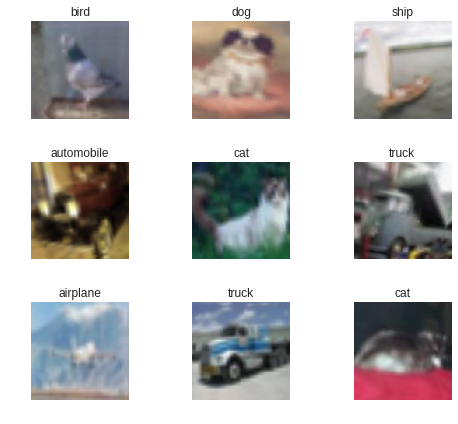

In [45]:
data.show_batch(rows=3, figsize=(7,6))

In [46]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [47]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [48]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.496284,0.313114,0.889700,08:53
1,0.332314,0.203345,0.930200,09:01
2,0.264930,0.174757,0.937500,07:20
3,0.233200,0.162786,0.942100,07:14


In [0]:
learn.save('stage-1')

In [50]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

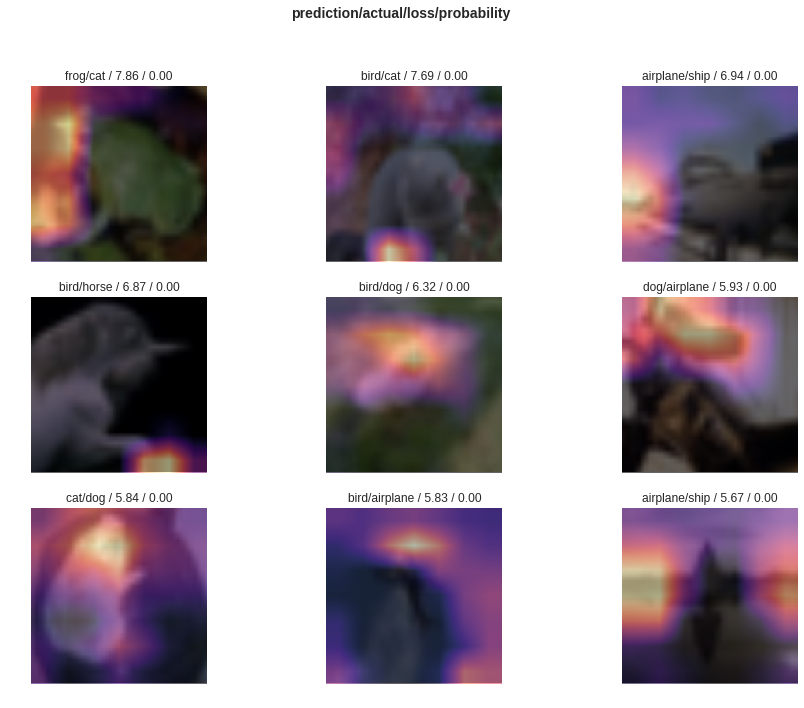

In [51]:
interp.plot_top_losses(9, figsize=(15,11))

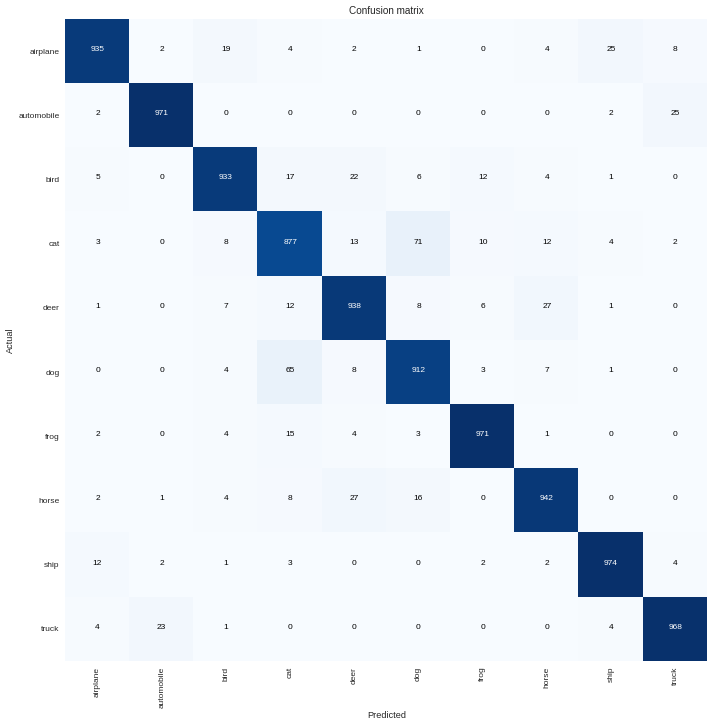

In [52]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [53]:
interp.most_confused(min_val=2)

[('cat', 'dog', 71),
 ('dog', 'cat', 65),
 ('deer', 'horse', 27),
 ('horse', 'deer', 27),
 ('airplane', 'ship', 25),
 ('automobile', 'truck', 25),
 ('truck', 'automobile', 23),
 ('bird', 'deer', 22),
 ('airplane', 'bird', 19),
 ('bird', 'cat', 17),
 ('horse', 'dog', 16),
 ('frog', 'cat', 15),
 ('cat', 'deer', 13),
 ('bird', 'frog', 12),
 ('cat', 'horse', 12),
 ('deer', 'cat', 12),
 ('ship', 'airplane', 12),
 ('cat', 'frog', 10),
 ('airplane', 'truck', 8),
 ('cat', 'bird', 8),
 ('deer', 'dog', 8),
 ('dog', 'deer', 8),
 ('horse', 'cat', 8),
 ('deer', 'bird', 7),
 ('dog', 'horse', 7),
 ('bird', 'dog', 6),
 ('deer', 'frog', 6),
 ('bird', 'airplane', 5),
 ('airplane', 'cat', 4),
 ('airplane', 'horse', 4),
 ('bird', 'horse', 4),
 ('cat', 'ship', 4),
 ('dog', 'bird', 4),
 ('frog', 'bird', 4),
 ('frog', 'deer', 4),
 ('horse', 'bird', 4),
 ('ship', 'truck', 4),
 ('truck', 'airplane', 4),
 ('truck', 'ship', 4),
 ('cat', 'airplane', 3),
 ('dog', 'frog', 3),
 ('frog', 'dog', 3),
 ('ship', 'cat', 3

In [0]:
learn.unfreeze()

In [55]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.224740,0.147745,0.949200,13:32


In [0]:
learn.load('stage-1');

In [57]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


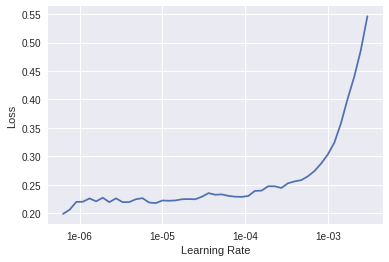

In [58]:
learn.recorder.plot()

In [59]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.207114,0.147564,0.949300,09:04
1,0.177932,0.136589,0.952900,09:10
